<a href="https://colab.research.google.com/github/naldye/Decision-Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Masukkan Dataset

# Bagian Baru

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Transform data Kategorikal Seperti Gender dan Tipe pekerjaan menjadi data numerik.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
data['gender'] = enc.fit_transform(data['gender'].values)
data['hypertension'] = enc.fit_transform(data['hypertension'].values)
data['heart_disease'] = enc.fit_transform(data['heart_disease'].values)
data['ever_married'] = enc.fit_transform(data['ever_married'].values)
data['work_type'] = enc.fit_transform(data['work_type'].values)
data['Residence_type'] = enc.fit_transform(data['Residence_type'].values)
data['smoking_status'] = enc.fit_transform(data['smoking_status'].values)
data['bmi'] = enc.fit_transform(data['bmi'].values)

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,239,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,418,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,198,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,217,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,113,2,1


Menampilkan info data untuk melihat tipe data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   int64  
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 479.2 KB


Karena Tujuan dari contoh ini untuk memprediksi stroke, maka kita akan drop data yang menyatakan stroke

In [ ]:
atr_data = data.drop(columns='stroke')
atr_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,239,1
1,51676,0,61.0,0,0,1,3,0,202.21,418,2
2,31112,1,80.0,0,1,1,2,0,105.92,198,2
3,60182,0,49.0,0,0,1,2,1,171.23,217,3
4,1665,0,79.0,1,0,1,3,0,174.12,113,2


In [ ]:
cls_data = data['stroke']
cls_data.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

Prediksi dan algoritma

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(atr_data, cls_data, test_size = 0.2, random_state = 500)
tree_data = DecisionTreeClassifier(random_state = 500)
tree_data.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=500)

fungsi "train_test_split" berguna untuk membagi(split) data secara random. "accuracy_score" untuk nilai akurasi klasifikasi, "confusion_matrix" menghitung confusion matrix untuk mengevaluasi nilai akurasi, "classification_report" untuk menampilkan laporan klasifikasi dan "DecisionTreeClassifier" sebagai algoritma Decision Tree

xtrain dan ytrain sebagai data training dan xtest dan ytest sebagai data testing. Lalu pada "train_test_split(atr_data, cls_data, test_size = 0.2, random_state = 500)", data dibagi sesuai atribut, class (stroke), Data test yang diambil sebanyak 20% dan diacak (random) dari 500 data yang ada.

Lalu kita menggunakan algoritma Decision Tree dan fit data training ke dalamnya

In [ ]:
y_pred = tree_data.predict(xtest)

In [ ]:
print("Prediksi Pada Test Set :\n {}". format(y_pred))

Prediksi Pada Test Set :
 [0 0 0 ... 0 0 1]


In [ ]:
print("Nilai Akurasi Pada Data Testing : ", tree_data.score(xtest,ytest))

Nilai Akurasi Pada Data Testing :  0.9050880626223092


Lalu untuk menampilkan nilai akurasi seperti diatas. Model Decision Tree Pada Dataset ini memiliki Nilai Akurasi Sekitar 90%.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       968
           1       0.17      0.20      0.18        54

    accuracy                           0.91      1022
   macro avg       0.56      0.57      0.57      1022
weighted avg       0.91      0.91      0.91      1022



Lalu untuk membuat grafik Decision Tree Seperti Berikut :

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file = "Decision_Tree.dot", class_names = ["1", "0"], feature_names = atr_data.columns, impurity = False, filled = True)

Pada kode diatas akan dimasukkan parameter "tree_data" sebagai data yang sudah dijalankan algoritma decision tree, "out_file = "Decision_Tree.dot"" untuk membuat dan memberi nama file, "class_names = ["1", "0"]" karena pada contoh ini untuk menunjukkan stroke atau tidak maka hasil classnya 1 atau 0. Dan untuk menampilkan grapfiknya sebagai berikut :

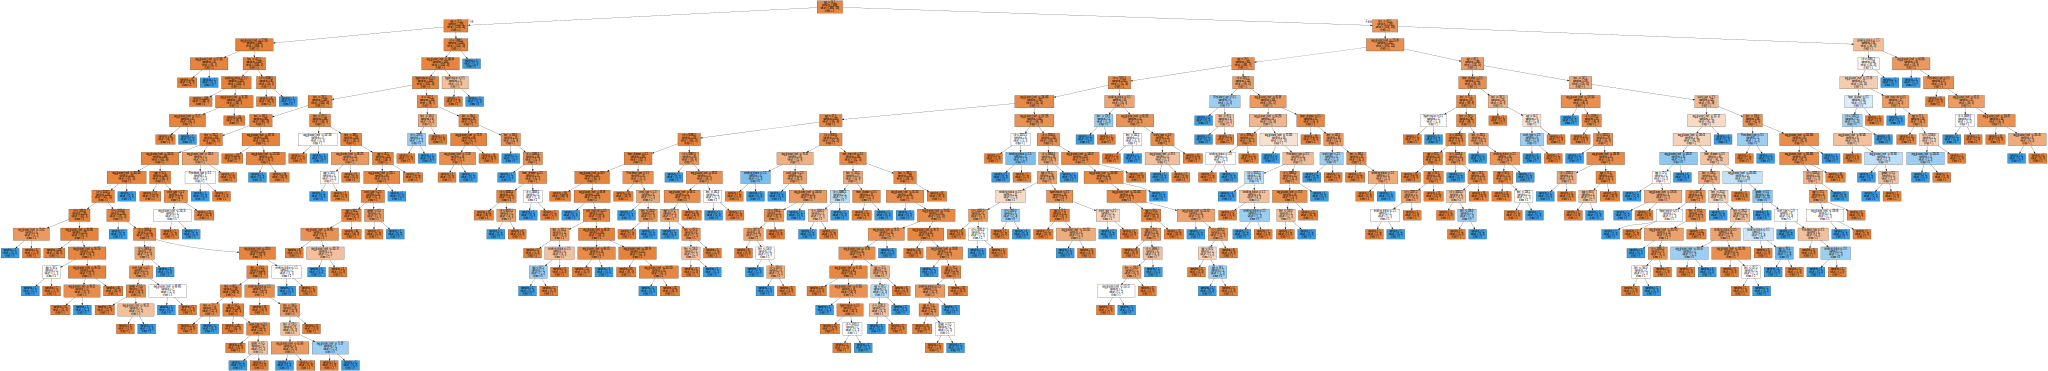

In [ ]:
import graphviz

with open("Decision_Tree.dot") as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(ytest, y_pred)

array([[914,  54],
       [ 43,  11]])

In [ ]:
ytest.unique()

array([0, 1])

In [ ]:
from sklearn.utils.multiclass import unique_labels
unique_labels(ytest)

array([0, 1])